Data description.

importing required libraries.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Loading the dataset.

In [129]:
df=pd.read_csv('sales_channel.csv')

In [130]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [131]:
df=df.drop('Unnamed: 0',axis=1)

In [132]:
df.shape

(200, 4)

In [133]:
df.isnull().sum() #checking for null values.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

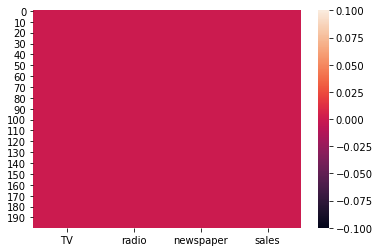

In [134]:
sns.heatmap(df.isnull())
plt.show()

Statistical summary. 

In [135]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [136]:
corre=df.corr()

In [137]:
corre

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


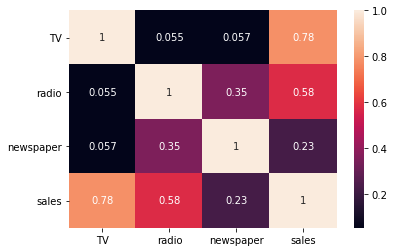

In [138]:
sns.heatmap(corre,annot=True)
plt.show()

In [139]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

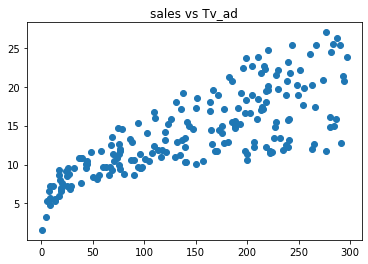

In [140]:
plt.title('sales vs Tv_ad')
plt.scatter(df['TV'],df['sales'])
plt.show()

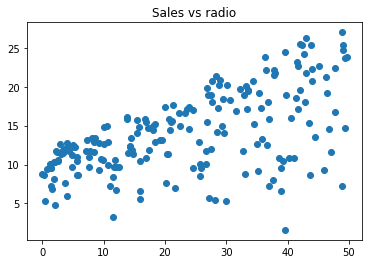

In [141]:
plt.title('Sales vs radio')
plt.scatter(df['radio'],df['sales'])
plt.show()

In [142]:
x=df.drop(['newspaper','sales'],axis=1)
y=df['sales']

Let's check for skewness and outliers in the data.

In [143]:
x.skew()

TV      -0.069853
radio    0.094175
dtype: float64

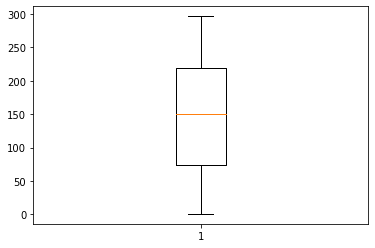

In [144]:
plt.boxplot(df['TV'])
plt.show()

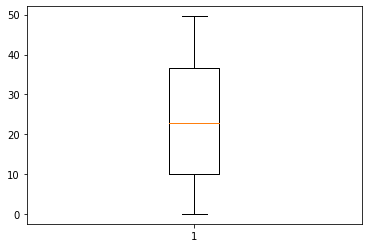

In [145]:
plt.boxplot(df['radio'])
plt.show()

Finding the best random state.

In [105]:
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [147]:
lr=LinearRegression()

In [148]:
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_test)
    acc=r2_score(y_test,predr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(maxAccu)
print(maxRS)

0.9332116756936784
13


In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [152]:
dr=DecisionTreeRegressor()
svr=SVR() 
rf=RandomForestRegressor()

In [155]:
model=[lr,dr,svr,rf]

In [157]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=13)
    m.fit(x_train,y_train)
    predl=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predl))
    print('mean_squared_error:',mean_squared_error(y_test,predl))
    print('mean_absolute_error:',mean_absolute_error(y_test,predl))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predl)))
    print('\n')

r2_score of LinearRegression() is:
0.9332116756936784
mean_squared_error: 2.1164646706223027
mean_absolute_error: 1.217537325797815
root_mean_squared_error 1.4548074342064323


r2_score of DecisionTreeRegressor() is:
0.9682751478753107
mean_squared_error: 1.0053333333333327
mean_absolute_error: 0.7699999999999999
root_mean_squared_error 1.002663120561105


r2_score of SVR() is:
0.8307354629106862
mean_squared_error: 5.3638478949660175
mean_absolute_error: 1.6787408791180034
root_mean_squared_error 2.315998250207892


r2_score of RandomForestRegressor() is:
0.9800666674205176
mean_squared_error: 0.6316701999999988
mean_absolute_error: 0.6381333333333329
root_mean_squared_error 0.7947768240204283




Cross_val_score

In [158]:
from sklearn.model_selection import cross_val_score

In [162]:
lrs=cross_val_score(lr,x,y,scoring='r2',cv=5)
print('LinearRegression cross_val_score:',lrs.mean())

LinearRegression cross_val_score: 0.889282957306453


In [163]:
drs=cross_val_score(dr,x,y,scoring='r2',cv=5) 
print('DecisionTreeRegressor cross_val_score:',drs.mean())

DecisionTreeRegressor cross_val_score: 0.9603187109397322


In [164]:
svs=cross_val_score(svr,x,y,scoring='r2',cv=5)
print('SVR cross_val_score:',svs.mean())

SVR cross_val_score: 0.8643453266859801


In [165]:
rfr=cross_val_score(rf,x,y,scoring='r2',cv=5)     
print('RandomforestRegressor cross_val_score:',rfr.mean())

RandomforestRegressor cross_val_score: 0.977528353021834


Hyper Parameter Tunning.

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
grid_param={'criterion':['mse','mae']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='r2',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mae'}


In [169]:
gd_pred=gd.best_estimator_.predict(x_test)

In [170]:
gd_pred

array([12.817 ,  3.835 , 15.445 , 13.015 , 11.605 , 25.309 , 20.452 ,
       13.238 , 24.381 , 15.499 , 17.033 ,  7.242 ,  9.552 , 16.738 ,
       14.592 , 16.333 ,  5.701 , 11.145 , 20.403 , 18.3195, 11.832 ,
        9.568 , 20.946 , 13.004 , 17.0585, 19.834 , 10.299 , 11.976 ,
       23.117 ,  4.869 , 15.505 , 19.0675, 18.669 ,  8.955 , 17.757 ,
        9.838 , 11.145 , 22.442 ,  7.892 , 11.736 , 10.379 , 19.146 ,
       22.322 ,  5.437 , 12.384 , 22.164 , 19.2615, 11.38  ,  8.981 ,
       22.16  , 20.686 , 10.577 , 11.206 , 11.87  ,  9.575 , 14.889 ,
       24.266 ,  7.341 ,  6.169 ,  9.88  ])

In [171]:
r2_score(y_test,gd_pred)

0.9978229377728491

Saving the Model.

In [172]:
import joblib

In [173]:
joblib.dump(gd.best_estimator_,'sales_adver.pkl')

['sales_adver.pkl']